## MNIST 

In this notebook, i will validate my implementation againt TensorFlow implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_moons, make_circles
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

from src.nn import Dense as mDense
from src.nn import Dropout as mDropout
from src.nn import ReLU, Softmax, NeuralNetwork

%matplotlib inline

np.seterr(all='raise')
np.random.seed(42)

Using TensorFlow backend.


### Loading MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

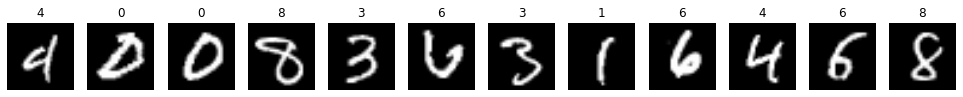

In [3]:
plt.figure(figsize=(17, 8))
indexes = np.random.randint(0, 60000, 12)
for i, idx in enumerate(indexes):
    label = y_train[idx]
    image = x_train[idx]
    plt.subplot(2, 12, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray', interpolation='bilinear')
    plt.title('%i' % label)

### Normalize MNIST data to float

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
input_shape = (x_train.shape[1], )
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

## TensorFlow MNIST

In [5]:
model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation=tf.nn.relu))
model.add(Dropout(.5))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(loss='sparse_categorical_crossentropy' , optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=32)
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred = np.argmax(model.predict(x_test), axis=-1)
print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

W0731 11:23:42.308873 140195804270720 deprecation.py:506] From /home/rdenadai/.pyenv/versions/3.7.3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.8707 - acc: 0.7393
Epoch 2/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4876 - acc: 0.8586
Epoch 3/100
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4092 - acc: 0.8830
Epoch 4/100
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3649 - acc: 0.8953
Epoch 5/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3379 - acc: 0.9032
Epoch 6/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3171 - acc: 0.9093
Epoch 7/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2981 - acc: 0.9147
Epoch 8/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2838 - acc: 0.9187
Epoch 9/100
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2705 - acc: 0.9233
Epoch 10/100
60000/60000 [==============================] - 4s 64us/sampl

60000/60000 [==============================] - 2s 39us/sample - loss: 0.1291 - acc: 0.9613
Epoch 80/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1273 - acc: 0.9610
Epoch 81/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1277 - acc: 0.9601
Epoch 82/100
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1257 - acc: 0.9617
Epoch 83/100
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1295 - acc: 0.9605
Epoch 84/100
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1271 - acc: 0.9615
Epoch 85/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1262 - acc: 0.9622
Epoch 86/100
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1256 - acc: 0.9618
Epoch 87/100
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1232 - acc: 0.9618
Epoch 88/100
60000/60000 [==============================] - 2s 41us/sample - 

### My Neural Network implementation

--------------------
Treinamento:
Epoch 1/45 =======> Loss: 0.49734 - Acc: 85.0%
Epoch 2/45 =======> Loss: 0.38855 - Acc: 89.0%
Epoch 3/45 =======> Loss: 0.32845 - Acc: 91.0%
Epoch 4/45 =======> Loss: 0.28809 - Acc: 92.0%
Epoch 5/45 =======> Loss: 0.25824 - Acc: 93.0%
Epoch 6/45 =======> Loss: 0.23775 - Acc: 93.0%
Epoch 7/45 =======> Loss: 0.217 - Acc: 94.0%
Epoch 8/45 =======> Loss: 0.20581 - Acc: 94.0%
Epoch 9/45 =======> Loss: 0.18954 - Acc: 95.0%
Epoch 10/45 =======> Loss: 0.17593 - Acc: 95.0%
Epoch 11/45 =======> Loss: 0.16856 - Acc: 95.0%
Epoch 12/45 =======> Loss: 0.15886 - Acc: 96.0%
Epoch 13/45 =======> Loss: 0.14869 - Acc: 96.0%
Epoch 14/45 =======> Loss: 0.14466 - Acc: 96.0%
Epoch 15/45 =======> Loss: 0.13766 - Acc: 96.0%
Epoch 16/45 =======> Loss: 0.13084 - Acc: 96.0%
Epoch 17/45 =======> Loss: 0.12631 - Acc: 96.0%
Epoch 18/45 =======> Loss: 0.12157 - Acc: 97.0%
Epoch 19/45 =======> Loss: 0.11812 - Acc: 97.0%
Epoch 20/45 =======> Loss: 0.11187 - Acc: 97.0%
Epoch 21/45 =====

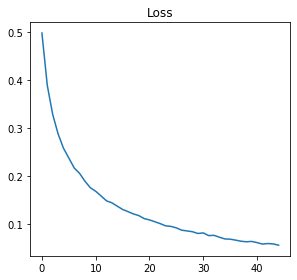

In [8]:
layers = (
    mDense(inputs=x_train.shape[1], outputs=100, activation=ReLU),
    mDropout(100, 100, probability=.5),
    mDense(inputs=100, outputs=10, activation=Softmax),
)

md = NeuralNetwork(layers, batch_size=32, lr=1e-2, decay=0)
print('-' * 20)
print('Treinamento:')
error = md.train(x_train.copy(), y_train.copy(), epochs=45, show_iter_err=1)

y_pred = md.predict(x_test.copy())
acc = (np.round(np.mean([y == p for y, p in zip(y_pred, y_test)]), 2) * 100)
print('-' * 20)
print(f'Acurácia: {acc}%')

print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

if len(error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss')
    plt.plot(range(len(error)), error)
    plt.tight_layout()
    plt.show()